In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt


In [4]:
pip install flask

Note: you may need to restart the kernel to use updated packages.


# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [7]:
# reflect an existing database into a new model
dbase= automap_base()
# reflect the tables
dbase.prepare(engine, reflect= True)

In [8]:
# We can view all of the classes that automap found
dbase.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
measures = dbase.classes.measurement

station= dbase.classes.station
station

sqlalchemy.ext.automap.station

In [30]:
session= Session(engine)

In [31]:
measures.date
session.query(func.max(measures.date)).all()

[('2017-08-23')]

In [32]:
# Create our session (link) from Python to the DB
session= Session(engine)

# Exploratory Climate Analysis

In [33]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database

lastday = dt.date(2017,8,23)
lastminus1= lastday- dt.timedelta(days=365)
lastminus1

# Perform a query to retrieve the date and precipitation scores
lastyear= session.query(measures.date, measures.prcp).\
    filter(measures.date >= lastminus1).all()

# Save the query results as a Pandas DataFrame and set the index to the date column

precipt= pd.DataFrame(lastyear)

precipt.set_index("date",inplace= True, drop= True)

# Sort the dataframe by date
precipt.sort_values("date", inplace= True)
# Use Pandas Plotting with Matplotlib to plot the data
precipt.head()

,prcp
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


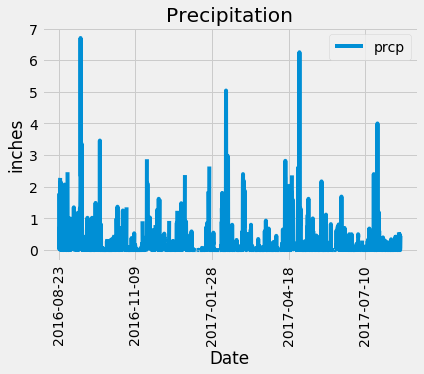

In [34]:
precipt.plot(rot=90)

# Set a title for the chart
plt.title("Precipitation")

plt.xlabel("Date")
plt.ylabel("inches")
plt.show()


In [35]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipt.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [36]:
# Design a query to show how many stations are available in this dataset?
session.query(func.count(station.station)).all()

[(9)]

In [37]:
# What are the most active stations? (i.e. what stations have the most rows)?/
#or most measured
# List the stations and the counts in descending order.
#could fit in one line of code, use.\

stationactive= session.query(func.count(measures.station), measures.station).\
group_by(measures.station).order_by(func.count(measures.station).desc()).all()

stationactive

[(2772, 'USC00519281'),
 (2724, 'USC00519397'),
 (2709, 'USC00513117'),
 (2669, 'USC00519523'),
 (2612, 'USC00516128'),
 (2202, 'USC00514830'),
 (1979, 'USC00511918'),
 (1372, 'USC00517948'),
 (511, 'USC00518838')]

In [38]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
#most active is USC00519281

lowtemp= session.query(func.min(measures.tobs), func.max(measures.tobs), func.avg(measures.tobs)).\
filter(measures.station=='USC00519281').all()
#average func.avg
lowtemp

[(54.0, 85.0, 71.66378066378067)]

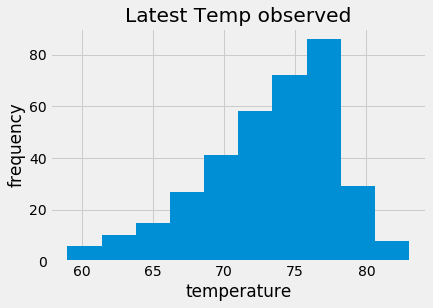

In [42]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

tempobserve = session.query(measures.date, measures.tobs).\
    filter(measures.station == 'USC00519281').\
filter(measures.date >= lastminus1).\
    group_by(measures.date).all()

# Put data into dataframe so it can be plotted as histogram
temp_results = pd.DataFrame(data=tempobserve, columns=["date", "tobs"])
temp_results = temp_results.set_index('date', drop=True)

#Plot the results as a histogram with bins=12
plt.hist(temp_results['tobs'])
plt.title("Latest Temp observed")
plt.ylabel("frequency")
plt.xlabel("temperature")
plt.show()

In [40]:
temp_results_df

,tobs
date,
2016-08-23,77.0
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0
...,...
2017-08-14,77.0
2017-08-15,77.0
2017-08-16,76.0


## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
